<a href="https://colab.research.google.com/github/RicksonMonteiroENCAUT/CriminalidadeRJ/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro
O estado do Rio de janeiro, conhecido por suas belas praias, belezas como o Cristo Redentor, pão de açúcar, entre outras belas maravilhas que carrega em seu território. Infelizmente, também vem sendo reconhecido pelo alto índice de criminalidade presente.

<center>
 <img alt="Imagem" width="75%" src="https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CriminalidadeRJ/master/vista-da-cidade-do-rio-de-janeiro-a-partir-do-corcovado-no-brasil_261932-227.jpg">
</center>

No ano de 2017 o Brasil Registrou uma taxa de 65.602 mil homicídios, cerca de 31,6 mortes para cada 100 mil habitantes. No ano de 2019, somente o estado do Rio de Janeiro obteve uma quantia de 5.976 mortes. Cerca de 35 para cada 100 mil habitantes, alcançando a marca de 7º estado mais violento do país.

<center>
 <img alt="Imagem" width="75%" src="https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CriminalidadeRJ/master/policia-militar-realiza-operacao-no-morro-do-fallet-no-rio-de-janeiro-rj-nesta-sexta-feira-8-durante-operacao-14-pessoas-foram-mortas-1549658574536_v2_1170x540-1000x540.jpg">
</center>

Este projeto tem o objetivo de Realizar uma análise dos dados disponibilizados pelo instituto de segurança pública para o estado do Rio de Janeiro desde 01/1991, afim de observar com foi o comportamento da violência neste estado e se possível, retirar *insights* sobre a mesma.


## Obtenção dos Dados

Os dados usados nesta análise foram obtidos através do portal ISPDados, onde é disponibilizado dados de registros criminais e de atividade policial do estado do Rio de Janeiro contruídos a partir de registros de ocorrência (RO), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro.

 Geralmente estes conjuntos de dados disponibilizados pelo governo são bem precários, comumente se encontram registros vazios e dados preenchidos erroneamente. Dessa forma, é de grande importância realizar inicialmente uma limpeza afim de realizar análises concretas.

<center>
 <img alt="Imagem" width="75%" src="https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CriminalidadeRJ/master/get-rid-of-dirty-data.jpg">
</center>

O *DataSet* utilizado aqui pode ser encontrado neste [link](https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CriminalidadeRJ/main/ViolenciaRJ1991.csv) 


### Importando os dados

Inicialmente iremos importar as bibliotecas que serão utilizadas.
O `pandas` para o manuseio do nosso conjunto de dados, o `matplotlib` que será utilizado com o intuito de auxiliar a plotagem de alguns gráficos e o `seaborn`, que será utilizado de forma auxiliar na plotagem de matrizes de correlação.
Em seguida é feita a leitura do conjunto de dados do link acima.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CriminalidadeRJ/main/ViolenciaRJ1991.csv", delimiter=";")

Encontrando a quantidade de variáveis e entradas no dataset


In [4]:
print("Variáveis: {}".format(df.shape[1]))
print("Entradas: {}".format(df.shape[0]))

Variáveis: 56
Entradas: 361


Temos um total de 56 variáveis e 344 entradas


#Dicionário de Variáveis

Segundo o dicionário de variáveis disponibilizado no site do [ISP](https://www.ispdados.rj.gov.br:4432/estatistica.html), temos as seguintes explicações:


`vano` - Ano da comunicação da ocorrência.

`mes` - Mês da comunicação da ocorrência.

`hom_doloso` - Homicídio doloso.

`lesao_corp_morte` - Lesão corporal seguida de morte.

`latrocinio` - Latrocínio (roubo seguido de morte).

`cvli` - Crimes violentos letais intencionais.

`hom_por_interv_policial` - Morte por intervenção de agente do Estado.

`tentat_hom` - Tentativa de homicídio.

`lesao_corp_dolosa` - Lesão corporal dolosa.

`estupro`	- Estupro.

`hom_culposo`	- Homicídio culposo (trânsito).

`lesao_corp_culposa` - Lesão corporal culposa (trânsito).

`roubo_comercio` - Roubo a estabelecimento comercial.

`roubo_residencia` - Roubo a residência.

`roubo_veiculo` - Roubo de veículo.

`roubo_carga` - Roubo de carga.

`roubo_transeunte` - Roubo a transeunte.

`roubo_em_coletivo` - Roubo em coletivo.

`roubo_banco` - Roubo a banco.

`roubo_cx_eletronico`	- Roubo de caixa eletrônico.

`roubo_celular` - Furto de telefone celular.

`roubo_conducao_saque` - Roubo com condução da vítima para saque em instituição financeira.

`roubo_apos_saque` - Roubo após saque em instituição financeira.

`roubo_bicicleta`	- Roubo de bicicleta.

`outros_roubos`	- Outros roubos que não os listados acima.

`total_roubos` - Total de roubos.	

`furto_veiculos` - Furto de veículo.

`furto_transeunte`	- Furto a transeunte.

`furto_coletivo`	- Furto em coletivo.

`furto_celular` -	Furto de telefone celular.

`furto_bicicleta`	- Furto de bicicleta.

`outros_furtos`	- Outros furtos que não os listados acima.

`total_furtos` - Total de furtos.

`sequestro` - Extorsão mediante sequestro (sequestro clássico).

`extorsao` - Extorsão.

`sequestro_relampago` - Extorsão com momentânea privação da liberdade (sequestro relâmpago).

`estelionato` - Estelionato.

`apreensao_drogas` - Apreensão de drogas.

`posse_drogas` - Número de registros que possuem algum título referente a posse de drogas.

`trafico_drogas` - Número de registros que possuem algum título referente a tráfico de drogas.

`apreensao_drogas_sem_autor` - Número de registros que possuem algum título referente a apreensão de drogas sem autor.

`recuperacao_veiculos` - Recuperação de veículo.

`apf` - Auto de Prisão em Flagrante.

`aaapai` - Auto de Apreensão de Adolescente por Prática de Ato Infracional.

`cmp` - Cumprimento de Mandado de Prisão.

`cmba` - Cumprimento de Mandado de Busca e Apreensão.

`ameaca` - Ameaça. 	

`pessoas_desaparecidas` - Pessoas desaparecidas.

`encontro_cadaver` - Encontro de cadáver.

`encontro_ossada` - Encontro de ossada.

`pol_militares_mortos_serv` - 	Policiais Militares mortos em serviço.

`pol_civis_mortos_serv`	- Policiais Civis mortos em serviço.

`registro_ocorrencias` - Registro de ocorrências.	

`fase` - 2 - Consolidado sem errata.    3 - Consolidado com errata.





Vizualizando as cinco primeira e cinco últimas entradas

In [5]:
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


In [6]:
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
356,2020,9,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3
357,2020,10,274,2,5,281,145,426,405,4602,452,168,1841,3971,1283,768,6022,1899,358,289,49,0,0,6,51,15,1239,9928,1058,813,431,1005,157,5864,9328,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,2
358,2020,11,324,2,8,334,80,414,400,4620,467,173,1780,3763,1301,707,5771,2083,331,273,71,1,2,7,64,12,1294,9909,1052,837,395,1017,148,5402,8851,1,107,7,3723,1738,803,820,147,1273,2629,381,642,37,4055,316,19,3,1,1,47940,2
359,2020,12,279,2,8,289,79,368,322,4672,424,186,1656,3544,1273,715,5532,2300,459,324,75,0,4,6,68,24,1368,10160,1111,807,318,1018,157,5508,8919,0,112,5,3541,1709,784,827,133,1190,2673,360,906,40,4116,308,20,0,1,1,47842,2
360,2021,1,361,2,13,376,149,525,479,5325,469,168,1666,4003,1410,1023,6436,2332,363,297,91,0,10,6,70,41,1413,11059,1183,850,355,1100,160,5704,9352,0,114,5,3906,1823,796,909,153,1303,2924,444,808,50,4857,383,35,4,0,0,52352,2


Analisando essas 10 entradas já é possível perceber a presença de valores nulos em algumas cédulas. 

In [7]:
df.isnull().sum()/df.shape[0]

ano                           0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
cvli                          0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_transeunte              0.0
roubo_celular                 0.0
roubo_em_coletivo             0.0
roubo_rua                     0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeun

Ao tentar calcular a porcentagem de valores ausentes em cada variável foi retornado o valor 0 para todas as variáveis. No entanto já nas primeiras 5 entradas já foram encontrados dados vazios. Vamos utilizar o `df.info()` a fim de obter informações detalhadas.   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         361 non-null    int64 
 1   mes                         361 non-null    int64 
 2   hom_doloso                  361 non-null    int64 
 3   lesao_corp_morte            361 non-null    object
 4   latrocinio                  361 non-null    int64 
 5   cvli                        361 non-null    object
 6   hom_por_interv_policial     361 non-null    object
 7   letalidade_violenta         361 non-null    int64 
 8   tentat_hom                  361 non-null    int64 
 9   lesao_corp_dolosa           361 non-null    int64 
 10  estupro                     361 non-null    object
 11  hom_culposo                 361 non-null    object
 12  lesao_corp_culposa          361 non-null    object
 13  roubo_transeunte            361 non-null    int64 

A maioria das variáveis estão sendo reconhecidas como `object`, no caso, `strings`, assim os espaços vazios presentes são reconhecidos como strings. Dessa forma, é necessário realizar uma conversão dessas variáveis para valores numéricos.

In [9]:
variaveis=['ano',	'mes',	'hom_doloso',	'lesao_corp_morte',	'latrocinio',	'cvli',	'hom_por_interv_policial',	'letalidade_violenta',	'tentat_hom',	'lesao_corp_dolosa',	'estupro',	'hom_culposo',	'lesao_corp_culposa',	'roubo_transeunte',	'roubo_celular',	'roubo_em_coletivo',	'roubo_rua',	'roubo_veiculo',	'roubo_carga',	'roubo_comercio',	'roubo_residencia',	'roubo_banco',	'roubo_cx_eletronico',	'roubo_conducao_saque',	'roubo_apos_saque',	'roubo_bicicleta',	'outros_roubos',	'total_roubos',	'furto_veiculos',	'furto_transeunte',	'furto_coletivo',	'furto_celular',	'furto_bicicleta',	'outros_furtos',	'total_furtos',	'sequestro',	'extorsao',	'sequestro_relampago',	'estelionato',	'apreensao_drogas',	'posse_drogas',	'trafico_drogas',	'apreensao_drogas_sem_autor',	'recuperacao_veiculos',	'apf',	'aaapai',	'cmp',	'cmba',	'ameaca',	'pessoas_desaparecidas',	'encontro_cadaver',	'encontro_ossada',	'pol_militares_mortos_serv',	'pol_civis_mortos_serv',	'registro_ocorrencias',	'fase']
df_new=df.copy()
for var in variaveis:
  df_new[var]=pd.to_numeric(df_new[var], errors='coerce')

Vizualizando as 5 primeiras entradas do nosso conjunto, já é possível perceber que agora há o devido reconhecimento desses valores nulos

In [10]:
df_new.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


Vizualizando os tipos das variáveis e calculando novamente a porcentagem de valores ausentes

In [11]:
df_new.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

In [12]:
df_new.isnull().sum()/df.shape[0]

ano                           0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.265928
latrocinio                    0.000000
cvli                          0.265928
hom_por_interv_policial       0.232687
letalidade_violenta           0.000000
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.398892
hom_culposo                   0.232687
lesao_corp_culposa            0.265928
roubo_transeunte              0.000000
roubo_celular                 0.299169
roubo_em_coletivo             0.000000
roubo_rua                     0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.398892
roubo_conducao_saque          0.398892
roubo_apos_saque              0.398892
roubo_bicicleta          

É possível perceber que algumas variáveis possuem uma quantidade muito elevada de valores ausentes. 
A variável `furto_bicicleta` e `roubo_bicicleta` possuem 76,45% dos valores ausentes, assim como as variáveis `posse_drogas`, `trafico_drogas`, `apreensao_drogas_sem_autor` possuem quase metade dos registros nulos (49,86%), bem como algumas outras variáveis. Esse dados ausentes podem ser devidos a diversos fatores, erros durante o processo de registro, perca de dados durante o tempo. Além disso, alguns dados só obtiveram os primeiros registros no ano de 2002, 2003 e outros somente 2006. Dessa forma, como uma maneira de obter respostas mais concretas irei considerar apenas os dados a partir do ano de 2010.

Apagando dados anteriores ao ano de 2010

In [13]:
df_new1=df_new.drop(df[df_new['ano']<2010].index)

vizualizando as 5 primeiras entradas do novo conjunto

In [14]:
df_new1.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
228,2010,1,447,6.0,19,472.0,77.0,549,377,7716,345.0,161.0,3511.0,5292,622.0,568,6482,1945,234,373,123,1,4.0,10.0,139.0,NaN,1036,10347,1683,2618,704.0,1768.0,NaN,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,56534.0,3
229,2010,2,473,3.0,6,482.0,62.0,544,329,7201,391.0,198.0,3267.0,5361,546.0,582,6489,1739,221,348,116,2,1.0,6.0,123.0,NaN,1003,10048,1669,4095,710.0,1985.0,NaN,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,56299.0,3
230,2010,3,492,4.0,17,513.0,81.0,594,391,6767,341.0,186.0,3661.0,6036,693.0,795,7524,2041,229,441,148,2,3.0,14.0,145.0,NaN,1100,11647,1713,2744,871.0,1954.0,NaN,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,59907.0,3
231,2010,4,432,2.0,11,445.0,102.0,547,347,6185,337.0,216.0,3209.0,5581,574.0,716,6871,1784,181,420,113,2,1.0,6.0,129.0,NaN,990,10497,1594,2263,789.0,1768.0,NaN,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,53658.0,3
232,2010,5,361,7.0,11,379.0,109.0,488,345,6267,345.0,208.0,3674.0,5749,650.0,691,7090,1648,215,441,132,2,3.0,8.0,147.0,NaN,963,10649,1670,2639,868.0,1941.0,NaN,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,58057.0,3


Calculando novamente a porcentagem de valores ausentes

In [15]:
df_new1.isnull().sum() / df_new1.shape[0]

ano                           0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.000000
latrocinio                    0.000000
cvli                          0.000000
hom_por_interv_policial       0.000000
letalidade_violenta           0.000000
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.000000
hom_culposo                   0.000000
lesao_corp_culposa            0.000000
roubo_transeunte              0.000000
roubo_celular                 0.000000
roubo_em_coletivo             0.000000
roubo_rua                     0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.000000
roubo_conducao_saque          0.000000
roubo_apos_saque              0.000000
roubo_bicicleta          

Essa consideração que foi realizada foi extremamente eficaz para remoção dos valores ausentes. Apenas a variável `furto_bicicleta` e `roubo_bicicleta` possui valores ausentes correspondendo 36% do conjunto total, alguns podem ser devido ao fato de que essa variável só passou a ser contabilizada a partir do ano de 2015. A fim de evitar descartar mais informações, vamos buscar substituir os valores ausentes. Primeiramente, vamos escolher uma das formas de substituição de valores ausentes. Existem diversas maneiras para isso, aqui considerarei substituir pela média, mediana, valor mais presente, ou por zeros.

Analisando mediana, média e valores mais presentes para variável `furto_bicicleta`

In [16]:
#Valores mais presentes
df_new1.furto_bicicleta.value_counts()

0.0      17
168.0     4
160.0     4
183.0     3
211.0     2
220.0     2
149.0     2
147.0     2
148.0     2
161.0     2
158.0     2
157.0     2
239.0     1
166.0     1
278.0     1
193.0     1
231.0     1
180.0     1
106.0     1
197.0     1
171.0     1
173.0     1
84.0      1
80.0      1
154.0     1
103.0     1
201.0     1
187.0     1
170.0     1
129.0     1
5.0       1
146.0     1
128.0     1
185.0     1
39.0      1
230.0     1
189.0     1
233.0     1
202.0     1
176.0     1
206.0     1
162.0     1
137.0     1
156.0     1
181.0     1
150.0     1
116.0     1
132.0     1
151.0     1
243.0     1
204.0     1
224.0     1
139.0     1
Name: furto_bicicleta, dtype: int64

In [17]:
df_new1.isnull().sum()

ano                            0
mes                            0
hom_doloso                     0
lesao_corp_morte               0
latrocinio                     0
cvli                           0
hom_por_interv_policial        0
letalidade_violenta            0
tentat_hom                     0
lesao_corp_dolosa              0
estupro                        0
hom_culposo                    0
lesao_corp_culposa             0
roubo_transeunte               0
roubo_celular                  0
roubo_em_coletivo              0
roubo_rua                      0
roubo_veiculo                  0
roubo_carga                    0
roubo_comercio                 0
roubo_residencia               0
roubo_banco                    0
roubo_cx_eletronico            0
roubo_conducao_saque           0
roubo_apos_saque               0
roubo_bicicleta               48
outros_roubos                  0
total_roubos                   0
furto_veiculos                 0
furto_transeunte               0
furto_cole

In [18]:
#média
df_new1.furto_bicicleta.mean()

133.4

In [19]:
#mediana
df_new1.furto_bicicleta.median()

158.0

Para variável `roubo_bicicleta`

In [20]:
#Valor mais presente
df_new1.roubo_bicicleta.value_counts()

0.0     17
13.0    10
17.0     8
14.0     6
16.0     5
19.0     4
12.0     4
15.0     4
18.0     4
4.0      3
8.0      3
7.0      2
23.0     2
21.0     2
24.0     2
26.0     1
27.0     1
10.0     1
9.0      1
20.0     1
29.0     1
5.0      1
3.0      1
41.0     1
Name: roubo_bicicleta, dtype: int64

In [21]:
#média
df_new1.roubo_bicicleta.mean()

12.258823529411766

In [22]:
#mediana
df_new1.roubo_bicicleta.median()

13.0

Por preferência, irei substituir cada terço dos valores ausentes por um desses valores. como temos 48 valores ausentes para cada variável, ficará 16 valores para média, 16 valores para mediana e 16 para o valor mais frequente. Isso para ambas as variáveis.


In [23]:
#furto bicicleta
df_new1.furto_bicicleta.fillna(df_new1.furto_bicicleta.median(), inplace=True, limit=16)
df_new1.furto_bicicleta.fillna(df_new1.furto_bicicleta.mean(), inplace=True, limit=16)
df_new1.furto_bicicleta.fillna(0, inplace=True, limit=16)
#Roubo bicicleta
df_new1.roubo_bicicleta.fillna(df_new1.roubo_bicicleta.median(), inplace=True, limit=16)
df_new1.roubo_bicicleta.fillna(df_new1.roubo_bicicleta.mean(), inplace=True, limit=16)
df_new1.roubo_bicicleta.fillna(0, inplace=True, limit=16)

Com o `df.info()` é possível perceber que não há mais valores ausentes.
Vizualizando as 5 primeiras entradas do conjunto totalmente limpo temos:

In [24]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 228 to 360
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         133 non-null    int64  
 1   mes                         133 non-null    int64  
 2   hom_doloso                  133 non-null    int64  
 3   lesao_corp_morte            133 non-null    float64
 4   latrocinio                  133 non-null    int64  
 5   cvli                        133 non-null    float64
 6   hom_por_interv_policial     133 non-null    float64
 7   letalidade_violenta         133 non-null    int64  
 8   tentat_hom                  133 non-null    int64  
 9   lesao_corp_dolosa           133 non-null    int64  
 10  estupro                     133 non-null    float64
 11  hom_culposo                 133 non-null    float64
 12  lesao_corp_culposa          133 non-null    float64
 13  roubo_transeunte            133 n

In [25]:
df_new1.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
228,2010,1,447,6.0,19,472.0,77.0,549,377,7716,345.0,161.0,3511.0,5292,622.0,568,6482,1945,234,373,123,1,4.0,10.0,139.0,13.0,1036,10347,1683,2618,704.0,1768.0,158.0,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,56534.0,3
229,2010,2,473,3.0,6,482.0,62.0,544,329,7201,391.0,198.0,3267.0,5361,546.0,582,6489,1739,221,348,116,2,1.0,6.0,123.0,13.0,1003,10048,1669,4095,710.0,1985.0,158.0,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,56299.0,3
230,2010,3,492,4.0,17,513.0,81.0,594,391,6767,341.0,186.0,3661.0,6036,693.0,795,7524,2041,229,441,148,2,3.0,14.0,145.0,13.0,1100,11647,1713,2744,871.0,1954.0,158.0,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,59907.0,3
231,2010,4,432,2.0,11,445.0,102.0,547,347,6185,337.0,216.0,3209.0,5581,574.0,716,6871,1784,181,420,113,2,1.0,6.0,129.0,13.0,990,10497,1594,2263,789.0,1768.0,158.0,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,53658.0,3
232,2010,5,361,7.0,11,379.0,109.0,488,345,6267,345.0,208.0,3674.0,5749,650.0,691,7090,1648,215,441,132,2,3.0,8.0,147.0,13.0,963,10649,1670,2639,868.0,1941.0,158.0,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,58057.0,3


## Análise Inicial dos Dados

Agora iremos vizualizar como nossos dados ficaram após a limpeza inicial.


In [26]:
print("Entradas: {}".format(df_new1.shape[0]))
print("Variáveis: {}".format(df_new1.shape[1]))

Entradas: 133
Variáveis: 56


In [27]:
df_new1.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

In [28]:
df_new1.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
228,2010,1,447,6.0,19,472.0,77.0,549,377,7716,345.0,161.0,3511.0,5292,622.0,568,6482,1945,234,373,123,1,4.0,10.0,139.0,13.0,1036,10347,1683,2618,704.0,1768.0,158.0,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,56534.0,3
229,2010,2,473,3.0,6,482.0,62.0,544,329,7201,391.0,198.0,3267.0,5361,546.0,582,6489,1739,221,348,116,2,1.0,6.0,123.0,13.0,1003,10048,1669,4095,710.0,1985.0,158.0,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,56299.0,3
230,2010,3,492,4.0,17,513.0,81.0,594,391,6767,341.0,186.0,3661.0,6036,693.0,795,7524,2041,229,441,148,2,3.0,14.0,145.0,13.0,1100,11647,1713,2744,871.0,1954.0,158.0,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,59907.0,3
231,2010,4,432,2.0,11,445.0,102.0,547,347,6185,337.0,216.0,3209.0,5581,574.0,716,6871,1784,181,420,113,2,1.0,6.0,129.0,13.0,990,10497,1594,2263,789.0,1768.0,158.0,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,53658.0,3
232,2010,5,361,7.0,11,379.0,109.0,488,345,6267,345.0,208.0,3674.0,5749,650.0,691,7090,1648,215,441,132,2,3.0,8.0,147.0,13.0,963,10649,1670,2639,868.0,1941.0,158.0,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,58057.0,3


In [29]:
df.isnull().sum()/df.shape[0]

ano                           0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
cvli                          0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_transeunte              0.0
roubo_celular                 0.0
roubo_em_coletivo             0.0
roubo_rua                     0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeun

## Informações Estatísticas da Violência no Rio de Janeiro

Esta etapa possui grande importância, nela buscaremos extrair dados estatísticos afim de retirar informações a respeito das variáveis



O método `describe()` retorna um resumo estatístico de cada variável

In [30]:
df_new1.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,2015.045113,6.458647,377.842105,3.413534,12.902256,394.157895,76.917293,471.075188,442.285714,6175.962406,433.195489,175.263158,3062.105263,5796.676692,1181.285714,835.120301,7813.082707,2768.759398,514.714286,487.887218,103.060150,1.894737,3.578947,7.601504,109.699248,10.887367,1475.142857,13293.255639,1359.676692,2323.879699,764.872180,1470.518797,120.780094,7587.428571,13591.631579,0.496241,139.353383,9.533835,2918.977444,1790.022556,724.518797,916.052632,185.180451,2009.624060,2657.834586,644.827068,1375.511278,100.150376,5777.007519,444.541353,38.105263,3.015038,1.699248,0.263158,61701.097744,2.969925
std,3.204790,3.484840,60.181398,2.082131,5.453474,63.722509,43.652388,78.192132,85.585822,1257.524597,57.279546,27.987794,893.819072,1543.138329,747.917924,372.210270,2455.279448,1035.471004,254.456241,130.497513,22.143731,1.410261,2.456317,3.731398,42.782215,7.802300,662.671912,4250.955774,149.969974,905.462380,193.334747,343.451148,77.208840,1037.177334,2287.676999,0.918035,30.943055,4.652384,663.675401,397.412568,200.450273,204.730026,39.923949,669.342866,414.771152,217.481992,326.083267,74.878335,1297.999285,83.878837,12.107638,2.181135,1.552051,0.562661,7290.792376,0.171440
min,2010.000000,1.000000,239.000000,0.000000,2.000000,249.000000,15.000000,297.000000,272.000000,2429.000000,241.000000,111.000000,584.000000,2260.000000,301.000000,345.000000,3298.000000,1413.000000,170.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,782.000000,7315.000000,904.000000,255.000000,105.000000,305.000000,0.000000,3089.000000,5722.000000,0.000000,49.000000,1.000000,717.000000,865.000000,274.000000,463.000000,106.000000,991.000000,1664.000000,308.000000,544.000000,2.000000,1409.000000,178.000000,16.000000,0.000000,0.000000,0.000000,31231.000000,2.000000
25%,2012.000000,3.000000,332.000000,2.000000,9.000000,344.000000,43.000000,415.000000,372.000000,5344.000000,396.000000,155.000000,2368.000000,4676.000000,505.000000,550.000000,5771.000000,1817.000000,290.000000,393.000000,91.000000,1.000000,2.000000,5.000000,71.000000,3.000000,951.000000,9714.000000,1281.000000,1634.000000,701.000000,1318.000000,5.000000,7237.000000,12686.000000,0.000000,121.000000,6.000000,2617.000000,1549.000000,610.000000,814.000000,157.000000,1408.000000,2396.000000,467.000000,1161.000000,48.000000,4789.000000,402.000000,29.000000,1.000000,1.000000,0.000000,58057.000000,3.000000
50%,2015.000000,6.000000,374.000000,3.000000,12.000000,391.000000,63.000000,473.000000,448.000000,6267.000000,429.000000,172.000000,3304.000000,5551.000000,916.000000,67

In [31]:
print("Média de roubo de veículos: {}".format(df_new1['roubo_veiculo'].mean()))
print("Média de furto de veículos: {}".format(df_new1['furto_veiculos'].mean()))
print("Média de recuperação de veículos de veículos {}".format(df['recuperacao_veiculos'].mean()))

Média de roubo de veículos: 2768.7593984962405
Média de furto de veículos: 1359.6766917293232
Média de recuperação de veículos de veículos 1757.268698060942


In [32]:
#Porcentagem de veículos recuperados
df_new1.recuperacao_veiculos.sum()/(df_new1.roubo_veiculo.sum() + df_new1.furto_veiculos.sum())

0.48677610994350573

Em média, 42,95% dos veículos que são furtados ou roubados são recuperados.

In [33]:
print("Homícidio doloso (máximo): {} - data: {}/{}".format(df_new1.hom_doloso.max(), df_new1.loc[df_new1.hom_culposo==df_new1.hom_culposo.max(), ["mes"]].values[0][0], df_new1.loc[df_new1.hom_culposo==df_new1.hom_culposo.max(), ["ano"]].values[0][0]))
print("Homícidio doloso (mínimo): {} - data: {}/{}".format(df_new1.hom_doloso.min(), df_new1.loc[df_new1.hom_culposo==df_new1.hom_culposo.min(), ["mes"]].values[0][0], df_new1.loc[df_new1.hom_culposo==df_new1.hom_culposo.min(), ["ano"]].values[0][0]))

Homícidio doloso (máximo): 510 - data: 12/2010
Homícidio doloso (mínimo): 239 - data: 3/2016


O mês com maior ocorrencia de homicídios dolosos ocorreu em 12/2010 (510 casos).
O mês com menor ocorrência de homícidios dolosos ocorreu em 03/2016 (236 casos).

In [34]:
print("Média de casos de estupros mensais no RJ: {}".format(df_new1.estupro.mean()))

Média de casos de estupros mensais no RJ: 433.1954887218045


Em média, há 433,19 casos de estupro por mês no estado do Rio de Janeiro.

In [35]:
print("Policiais civis mortos por mês em média: {}".format(df_new1.pol_civis_mortos_serv.mean()))
print("Policiais militares mortos por mês em média: {}".format(df_new1.pol_militares_mortos_serv.mean()))

Policiais civis mortos por mês em média: 0.2631578947368421
Policiais militares mortos por mês em média: 1.699248120300752


A média de mortes de policiais em operações por mês no estado do Rio de Janeiro é bastante baixa. A média de mortes de policiais civís não alcança um por mês. Já a média de mortes de policiais militares é cerca de 1,7 por mês.  

In [36]:
print("Média de pessoas desaparecidas por mês: {}".format(df_new1.pessoas_desaparecidas.mean()))
print("Média de cadáveres encontrados por mês: {}".format(df_new1.encontro_cadaver.mean()))
print("Média de ossadas encontradas por mês: {}".format(df_new1.encontro_ossada.mean()))

Média de pessoas desaparecidas por mês: 444.54135338345867
Média de cadáveres encontrados por mês: 38.10526315789474
Média de ossadas encontradas por mês: 3.0150375939849625


No Rio de Janeiro há uma média de 444,54 pessoas desaparecidas por mês
A média de cadáveres encontrados por mês é de 38,10. Já a média de ossadas encontradas por mês é apenas 3.01.

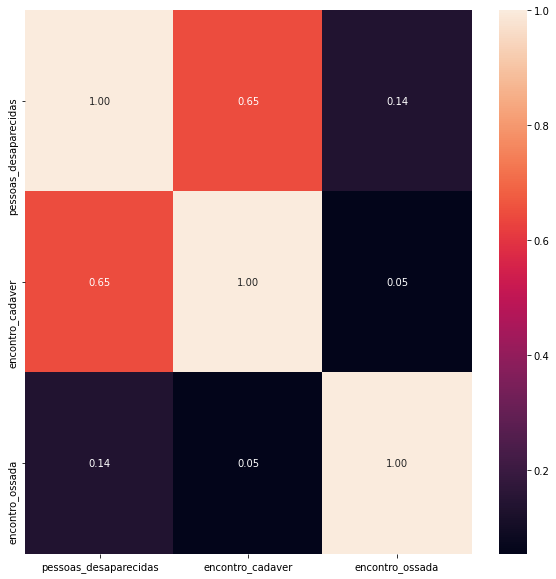

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new1[["pessoas_desaparecidas","encontro_cadaver","encontro_ossada"]].corr(), fmt='.2f',annot=True);

Pela matriz de correlação acima é possível perceber que o número de pessoas desaparecidas não apresenta nenhum tipo de correlação forte com o número de cadáveres e ossadas encontradas por mês. Apenas uma correlação moderada entre as variáveis `pessoas_desaparecidas` e `encontro_cadaver`, o que faz sentido. 

## Visualização de Dados

Nesta etapa buscaremos vizualizar gráficos das variáveis `hom_doloso` e `roubo_em_coletivo` afim de buscar algumas informações a mais.

In [38]:
df_new1.reset_index(drop=True, inplace=True)

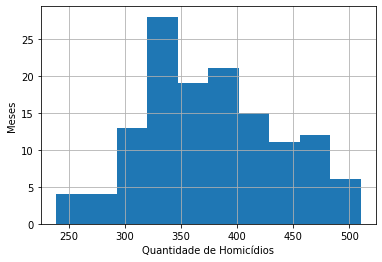

In [39]:
plt.ylabel('Meses')
plt.xlabel('Quantidade de Homicídios')
df_new1.hom_doloso.hist();

In [40]:
df_new1.hom_doloso.mean()

377.8421052631579



*   Houveram cerca de 30 meses em que a quantidade de homicídios dolosos se manteve entre 300 - 350 casos.
*   Houve cerca de 6 meses em que os casos de homicídios dolosos chegaram a 500 casos

* A média de casos de homicídios dolosos por mês é de  377,84 



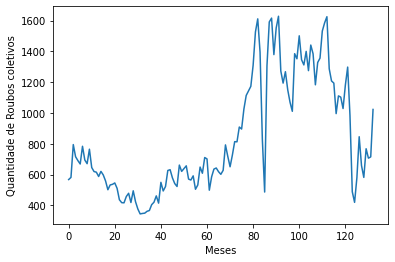

In [41]:
plt.xlabel('Meses')
plt.ylabel('Quantidade de Roubos coletivos')
df_new1.roubo_em_coletivo.plot(kind='line');

In [42]:
df_new1.loc[df_new1.roubo_em_coletivo.max()==df_new1.roubo_em_coletivo]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
91,2017,8,397,4.0,16,417.0,70.0,487,528,5230,433.0,178.0,2576.0,8815,2417.0,1628,12860,4613,843,649,111,2,1.0,6.0,79.0,4.0,2638,21806,1318,1754,757.0,1340.0,183.0,7768,13120,0.0,145.0,11.0,2988.0,1887,725.0,1016.0,182.0,3494,2833.0,623.0,1818.0,222.0,4701.0,420.0,42,5.0,2.0,1.0,70380.0,3


A partir do gráfico de linha é possível perceber o crescimento da quantidade de roubos em coletivo, tendo um pico muito alto no ano de 2017, alcançando um número de 1628 casos no mês de agosto.

## Conclusão

Logo de início se encontrou a necessidade de realizar uma limpeza e tratamento inicial nos dados disponibilizados pelo ISP, devido alguns valores ausentes e variáveis reconhecidas como texto. 
Após a limpeza foi possível retirar algumas informações, tais como:

* Média de roubo de veículos mensais: 2442.79.
* Média de furto de veículos mensais: 1648.05.
* Média de recuperação de veículos por mês: 1757.27.
* Apenas cerca de 49% dos veículos roubados são recuperados.
* A média de casos de homicídios dolosos por mês é de 377,84
* Dezembro de 2010 foi o mês com mais casos de homicídios dolosos nos últimos dez anos, alcançando a quantiadade de 510 casos.
* Média de casos de estupros mensais: 433.19.
* Média de policiais civis mortos por mês em média: 0.26.
* Média de policiais militares mortos por mês em média: 1.70.
* Média de pessoas desaparecidas por mês: 444.54
* Média de cadáveres encontrados por mês: 38.10
* Média de ossadas encontradas por mês: 3.01
* Existe uma correlação moderada entre as variáveis `pessoas_desaparecidas` e `encontro_cadaver`, o que faz sentido. Isso pode indicar que os grande parte das pessoas desaparecidas são encontradas com vida.  
* Na maior parte dos meses a quantia de casos de homícidios permanecem próximas a média.
* A partir do gráfico de linha é possível perceber o crescimento da quantidade de roubos em coletivo, tendo um pico muito alto no ano de 2017, alcançando um número de 1628 casos no mês de agosto. Também pode-se perceber que houve uma grande queda entre os meses 100 e 120 (anos de 2019 e 2020), muito provavelmente por conta da pandemia na qual estamos passando atualmente. 


